In [ ]:
!pip install -U scikit-fuzzy
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import tensorflow as tf
from __future__ import absolute_import, division, print_function
import sys
import matplotlib.pyplot as plt
import logging

#Fuzzification of IHDP

In [21]:
df= pd.read_csv('https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv', header = None)
df.dataframeName = 'data'
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df.columns = cols

In [22]:
df.shape

(747, 30)

In [43]:
X=df[[i for i in range(25)]]

In [44]:
X.shape

(747, 25)

In [45]:
X=X.values.reshape((747*25))

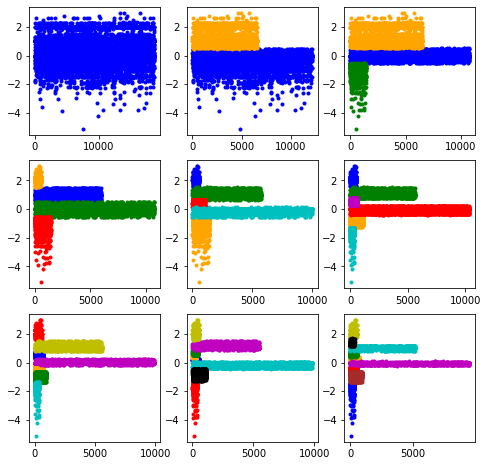

In [46]:
# Number of parent smoking per day fuzzification

from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [4, 1, 5]
           




xpts=X


fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.transpose(xpts.reshape((xpts.shape[0], 1)))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 1):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j], '.', color=colors[j])



cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000)

# alldata = xpts

from scipy.spatial.distance import cdist
Test1=cdist(np.transpose(alldata), cntr, metric='euclidean')

In [53]:
#|low|
l=u_orig[1].sum()
#|average|
m=u_orig[0].sum()
#|high|
h=u_orig[2].sum()
print('(|low|, |average|, |high|) = ', (l, m , h))

(|low|, |average|, |high|) =  (6352.295349719891, 10891.60018159687, 1431.1044686832392)


In [56]:
#|low|+ |average| + |high|
total = l+m+h
print(total)

18675.0


In [58]:
#p(low), p(average), p(high)
pl = l/total
pm = m/total
ph = h/total
print('(p(low), p(average), p(high)) = ', (pl, pm ,ph))

(p(low), p(average), p(high)) =  (0.34014968405461266, 0.5832182158820278, 0.07663210006335953)


In [59]:
# FATE_l* p(low) +  FATE_m* p(average) + FATE_h* p(high)
FATE = 3.812*pl + 4.015*pm + 4.192*ph


In [60]:
FATE

3.959513495848128